# Open and plot Calcium time series from igor files
### Daniel Torres-Torres$^1$ & Marco Arieli Herrera-Valdez$^1$
### $^1$ Facultad de Ciencias, UNAM

This notebook shows how to open pxp files recorded from Igor and visualize the data with simple graphs.


In [16]:
import scipy as sc
import matplotlib.pylab as gr
import igor.igorpy as igor
%matplotlib inline

In [4]:
# Setup path for data directory and filename
dataDir="./microcircuitsNetworks/"
fileName= "cort76dp1c.pxp"

Create a custom function to extract the time series from the pxp files

In [22]:
def extractDebleachedFminData(filePath):
    """
    extractDebleachedFminData takes a path to a pxp data file as only argument and extracts all the wave data found there, 
    provided the data has the suffix F_min
    
    Example:
    dataDir="./microcircuitsNetworks/"
    fileName= "cort76dp1c.pxp"
    waveData, timeStamps=extractDebleachedFminData(dataDir+fileName)
    """
    allData= igor.load(filePath)
    #dataNames= st.digits.split(allData.children[0].userstr["S_waveNames"], ";")[:-1]
    bbb=allData.children[0].userstr[b"S_waveNames"]
    aaa=bbb.decode("UTF-8")
    dataNames= aaa.split(";")[:-1]
    waves= list()
    for m in sc.arange(len(dataNames)):
        waveNum=sc.int32(dataNames[m][1+str.rfind(dataNames[0],"e"):])
        str1= "waves.append(allData."+dataNames[m] + "_%dF_min.data)"%(waveNum-1)
        #print(dataNames[m],str1)
        exec(str1)
    return sc.array(waves), sc.array(allData.sec.data)

Extract the data and count how many time series (each time series corresponds to the Ca-flourescence from one cell) it contained

In [23]:
fMinData,sampTimes=extractDebleachedFminData(dataDir+fileName)
nCells=len(fMinData)
# Find how many time series were extracted
print("Found %d time series"%nCells)

Found 330 time series


#### Plot one time series

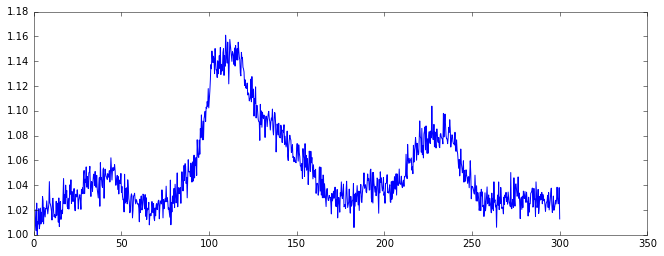

In [18]:
n=200
gr.figure(figsize=(11,4))
gr.plot(sampTimes,fMinData[n])

#### Plot several time series in a single graph

Ploting waves:
[105 317 194 267 315]


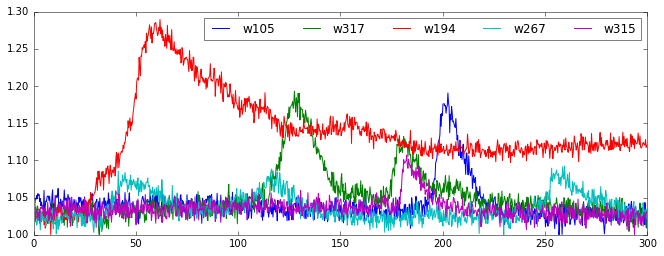

In [27]:
# Extract a random sample of nWaves integers to pick the waves
nWaves=5
wNumbers=sc.random.randint(0,nCells,nWaves)
print("Ploting waves:")
print(wNumbers)

gr.figure(figsize=(11,4))
gr.ioff()
for n in wNumbers: 
    gr.plot(sampTimes,fMinData[n],label="w%d"%n)
gr.xlim(0,sampTimes.max())
gr.legend(ncol=nWaves)
gr.ion();gr.draw()
